# Exploratory Data Analysis

In [1]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


from us_state_abbrev import us_state_abbrev, abbrev_us_state
%matplotlib inline
# %%
datap = Path('../Data')  # set the data path


INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
# import
dfin = pd.read_parquet(datap/'merged_df.parquet.gzip')
dfin

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Murder and _nonnegligent _manslaughter,Rape_(revised _definition)1,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3
0,AL,Autauga,0.388898,18.4,0.5,1.1,0.1,1.7,2.7,75.9,...,0.0,15.0,NaN,3.0,54.0,444.0,160.0,238.0,46.0,NaN
1,AL,Baldwin,0.297942,9.5,0.7,0.9,0.1,1.5,4.6,83.1,...,0.0,13.0,NaN,27.0,71.0,674.0,250.0,380.0,44.0,NaN
2,AL,Barbour,0.556605,47.6,0.6,0.5,0.2,0.9,4.8,46.3,...,1.0,2.0,NaN,2.0,16.0,115.0,43.0,63.0,9.0,NaN
3,AL,Bibb,0.394100,22.1,0.4,0.2,0.1,0.9,2.1,74.6,...,0.0,0.0,NaN,0.0,8.0,123.0,65.0,40.0,18.0,NaN
4,AL,Blount,0.221056,1.8,0.6,0.3,0.1,1.1,8.7,87.8,...,0.0,9.0,NaN,0.0,82.0,947.0,302.0,562.0,83.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,WY,Platte,0.197897,0.9,0.7,0.5,0.2,1.4,7.8,89.2,...,0.0,NaN,0.0,0.0,2.0,36.0,16.0,17.0,3.0,0.0
2419,WY,Sheridan,0.162154,1.2,1.4,0.8,0.1,1.4,4.3,91.4,...,0.0,NaN,0.0,0.0,1.0,39.0,7.0,30.0,2.0,1.0
2420,WY,Sublette,0.218882,1.4,1.1,1.1,0.0,1.4,7.8,88.0,...,0.0,NaN,1.0,0.0,13.0,119.0,13.0,101.0,5.0,0.0
2421,WY,Sweetwater,0.340296,1.7,1.2,0.9,0.2,1.7,15.9,79.6,...,0.0,NaN,2.0,0.0,18.0,111.0,25.0,73.0,13.0,3.0


In [3]:
dfin.columns

Index(['State', 'County', 'Diversity-Index',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific Islander alone, percent,',
       'Two or More Races, percent, 2013', 'Hispanic or Latino, percent, 2013',
       'White alone, not Hispanic or Latino, percent, 2013', 'Violent _crime',
       'Murder and _nonnegligent _manslaughter', 'Rape_(revised _definition)1',
       'Rape_(legacy_definition)2', 'Robbery', 'Aggravated _assault',
       'Property _crime', 'Burglary', 'Larceny-_theft',
       'Motor _vehicle _theft', 'Arson3'],
      dtype='object')

In [4]:
df = dfin[['State', 'County', 'Diversity-Index', 'Violent _crime']]
df

,State,County,Diversity-Index,Violent _crime
0,AL,Autauga,0.388898,72.0
1,AL,Baldwin,0.297942,111.0
2,AL,Barbour,0.556605,21.0
3,AL,Bibb,0.394100,8.0
4,AL,Blount,0.221056,91.0
...,...,...,...,...
2418,WY,Platte,0.197897,2.0
2419,WY,Sheridan,0.162154,1.0
2420,WY,Sublette,0.218882,14.0
2421,WY,Sweetwater,0.340296,20.0


In [15]:
# group by state and sort by diversity
df_gb_state = df.groupby('State').mean()
df_gb_state = df_gb_state.sort_values(by='Diversity-Index', ascending=False)
df_gb_state

,Diversity-Index,Violent _crime
State,,
NM,0.534457,101.647059
CA,0.512964,429.250000
AZ,0.500013,222.769231
SC,0.492384,316.024390
NJ,0.484808,0.800000
TX,0.453864,76.118644
GA,0.446404,45.395161
FL,0.438717,582.584615
OK,0.435267,19.067568


<br>
<br>

## Plot: Diversity Index by State

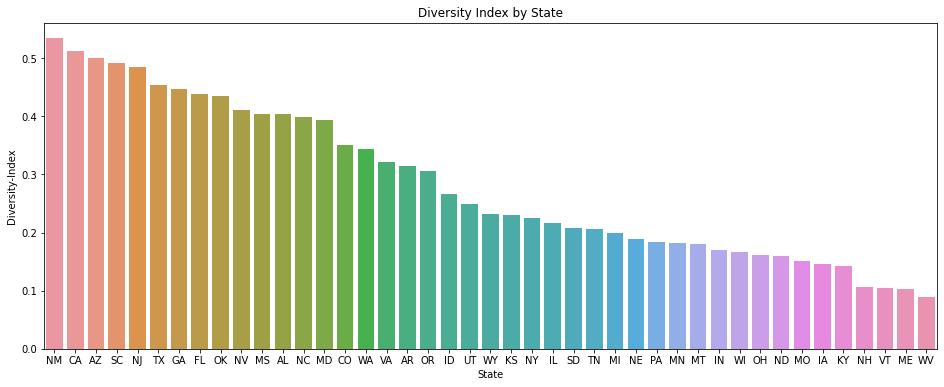

In [17]:
plt.figure(figsize=[16,6])
sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'])
plt.title('Diversity Index by State')
plt.show()

<br>
<br>

## Plot: Violent Crime by State